In [15]:
import pandas as pd
# lae elektrihindade graafikud


json_path = r"C:\Users\User\Desktop\AndmeTarkusGit\andmeTarkus-1\elektrihind\el1_data_2024.json"
df = pd.read_json(json_path)
df_expanded = pd.json_normalize(df['data'])

# eemalda timestamp veerg

if 'timestamp' in df_expanded.columns:
    df_expanded = df_expanded.drop(columns=['timestamp'])

print(df_expanded)

      price          datetime
0     26.66  2024-01-01 03:00
1     24.48  2024-01-01 04:00
2     24.01  2024-01-01 05:00
3     21.23  2024-01-01 06:00
4     22.62  2024-01-01 07:00
...     ...               ...
8767  54.18  2024-12-31 21:00
8768  25.08  2024-12-31 22:00
8769   7.94  2024-12-31 23:00
8770   4.01  2025-01-01 00:00
8771   4.85  2025-01-01 01:00

[8772 rows x 2 columns]


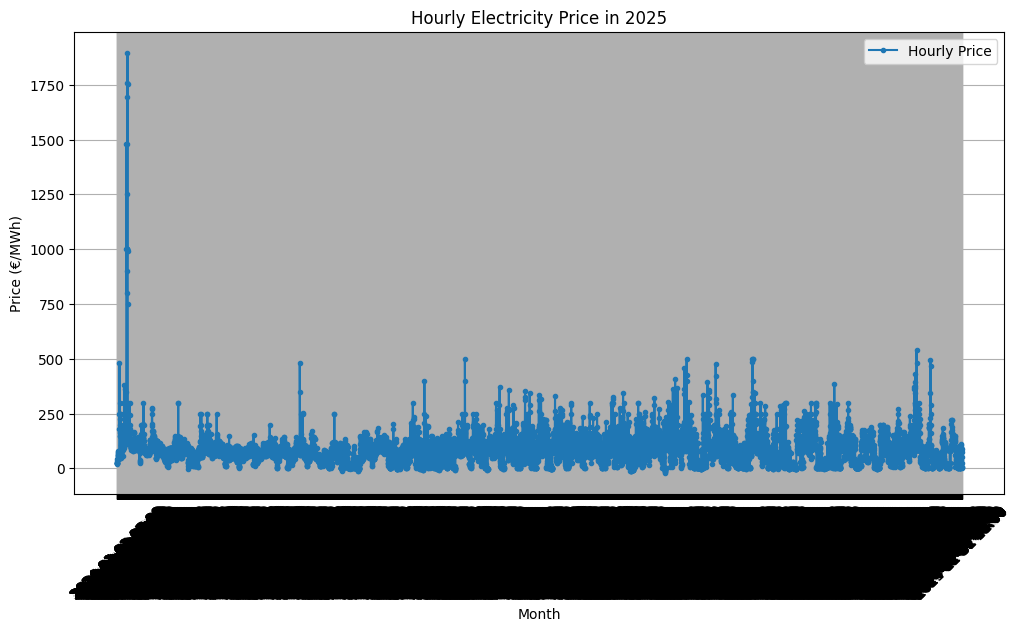

In [ ]:
# Graafik elektrihind tundide lõikes
plt.figure(figsize=(12, 6))
plt.plot(df_expanded['datetime'], df_expanded['price'],
         marker='.', linestyle='-', label="Hourly Price")
plt.title("Hourly Electricity Price in 2024")
plt.xlabel("Month")
plt.ylabel("Price (€/MWh)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
# plt.tight_layout()
plt.show()

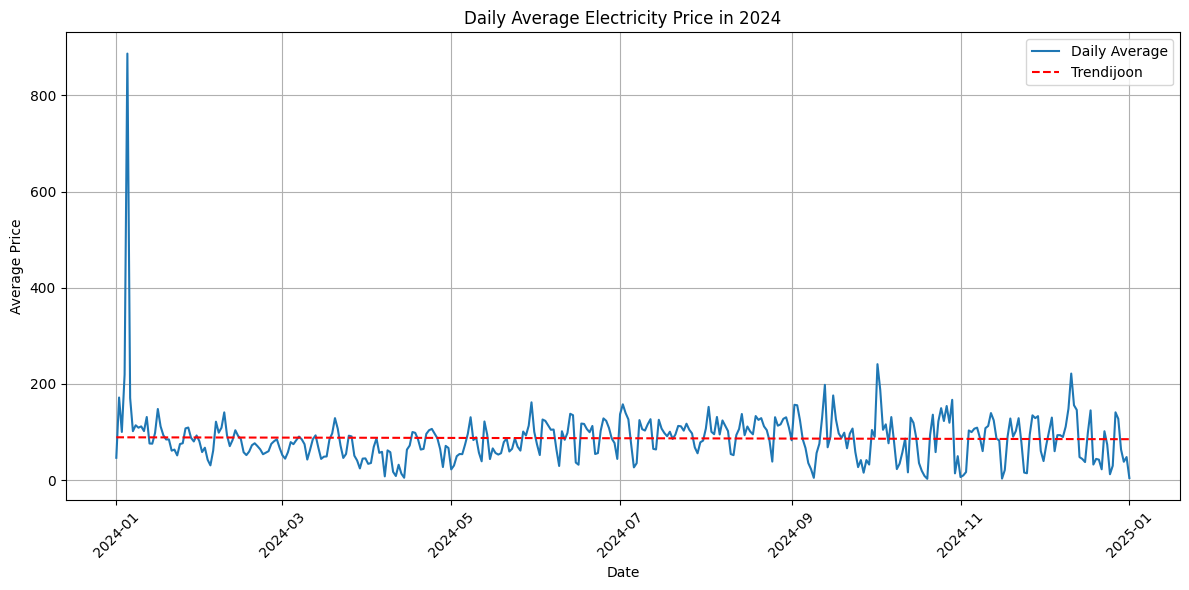

In [18]:
# Andmed päevade kaupa
df_expanded['date'] = pd.to_datetime(df_expanded['datetime']).dt.date
daily_avg = df_expanded.groupby('date')['price'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg['date'], daily_avg['price'],
         linestyle='-', label="Daily Average")

# Trendijoone lisamine
x = np.arange(len(daily_avg['date']))
z = np.polyfit(x, daily_avg['price'], 1)
p = np.poly1d(z)
plt.plot(daily_avg['date'], p(x), color='red',
         linestyle='--', label='Trendijoon')

plt.title("Daily Average Electricity Price in 2024")
plt.xlabel("Date")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

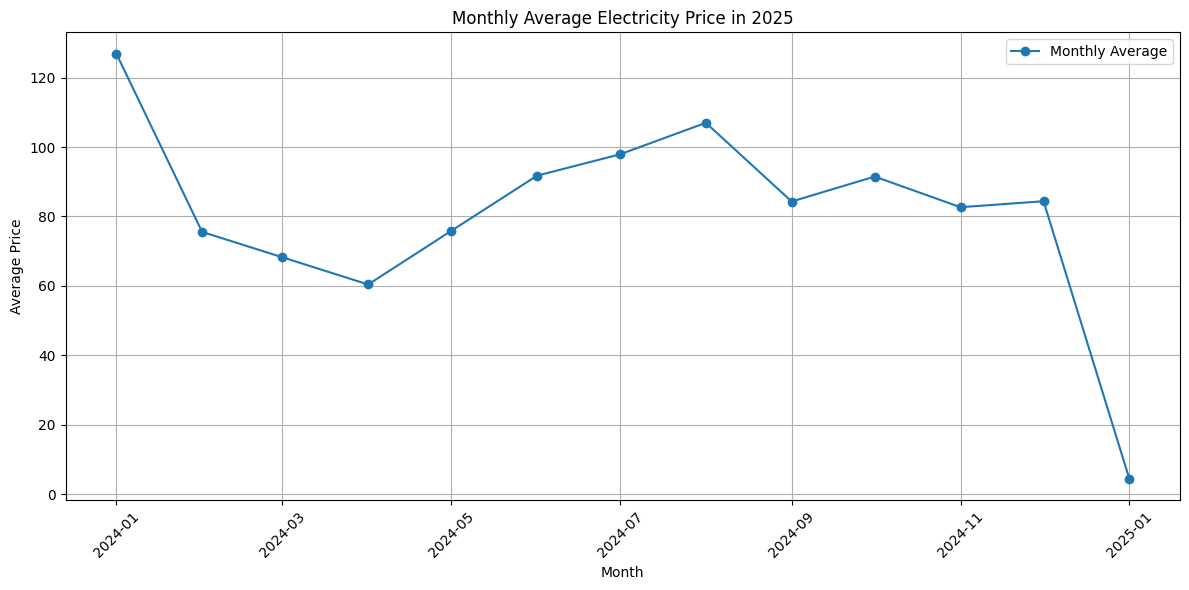

In [19]:
# Andmed kuude kaupa
df_expanded['month'] = pd.to_datetime(
    df_expanded['datetime']).dt.to_period('M')
monthly_avg = df_expanded.groupby('month')['price'].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg['month'], monthly_avg['price'],
         marker='o', linestyle='-', label="Monthly Average")
plt.title("Monthly Average Electricity Price in 2025")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
# lae elektrihindade graafikud

json_path_weather = r"C:\Users\User\Desktop\AndmeTarkusGit\andmeTarkus-1\python_harjutused\Python_excs\ANALYSIS\output\Tallinn-Harku-CSV-2024.csv"
df = pd.read_csv(json_path_weather)
df_expanded = pd.DataFrame(df)

print(df_expanded)

      Aasta  Kuu  Päev Kell (UTC)  Õhutemperatuur °C  \
0      2024    1     1   00:00:00               -7.5   
1      2024    1     1   01:00:00               -7.3   
2      2024    1     1   02:00:00               -7.7   
3      2024    1     1   03:00:00               -7.4   
4      2024    1     1   04:00:00               -6.8   
...     ...  ...   ...        ...                ...   
8779   2024   12    31   19:00:00               -2.8   
8780   2024   12    31   20:00:00               -3.8   
8781   2024   12    31   21:00:00               -4.3   
8782   2024   12    31   22:00:00               -4.2   
8783   2024   12    31   23:00:00               -3.8   

      10 minuti keskmine tuule kiirus m/s  
0                                     0.7  
1                                     0.6  
2                                     0.4  
3                                     0.9  
4                                     2.8  
...                                   ...  
8779               

In [29]:
import pandas as pd

# Lae ilmadata
json_path_weather = r"C:\Users\User\Desktop\AndmeTarkusGit\andmeTarkus-1\python_harjutused\Python_excs\ANALYSIS\output\Tallinn-Harku-CSV-2024.csv"
weather_df = pd.read_csv(json_path_weather)   # <- kasuta kohe weather_df

# Lisa datetime veerg
weather_df["datetime"] = pd.to_datetime(
    weather_df["Aasta"].astype(str) + "-" +
    weather_df["Kuu"].astype(str) + "-" +
    weather_df["Päev"].astype(str) + " " +
    weather_df["Kell (UTC)"]
)

print(weather_df.head())

   Aasta  Kuu  Päev Kell (UTC)  Õhutemperatuur °C  \
0   2024    1     1   00:00:00               -7.5   
1   2024    1     1   01:00:00               -7.3   
2   2024    1     1   02:00:00               -7.7   
3   2024    1     1   03:00:00               -7.4   
4   2024    1     1   04:00:00               -6.8   

   10 minuti keskmine tuule kiirus m/s            datetime  
0                                  0.7 2024-01-01 00:00:00  
1                                  0.6 2024-01-01 01:00:00  
2                                  0.4 2024-01-01 02:00:00  
3                                  0.9 2024-01-01 03:00:00  
4                                  2.8 2024-01-01 04:00:00  


Merged shape: (8772, 9)
             datetime  Õhutemperatuur °C  price_eur_mwh
0 2024-01-01 01:00:00               -7.3          26.66
1 2024-01-01 02:00:00               -7.7          24.48
2 2024-01-01 03:00:00               -7.4          24.01
3 2024-01-01 04:00:00               -6.8          21.23
4 2024-01-01 05:00:00               -7.5          22.62


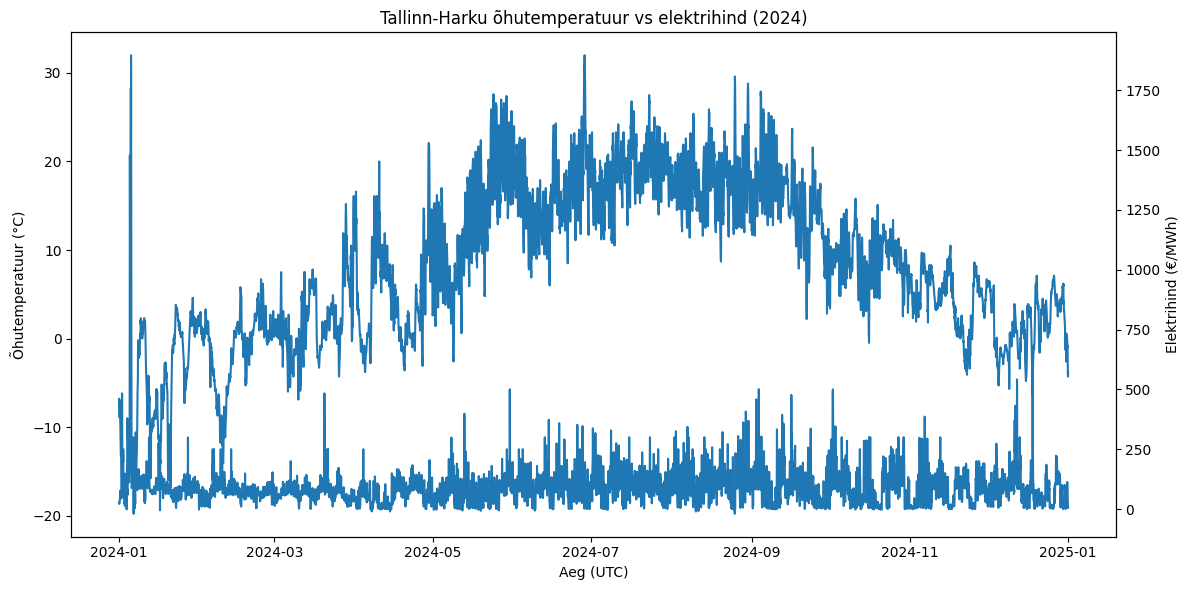

        month   avg_temp   avg_price
0  2024-01-01  -6.182907  126.600606
1  2024-02-01  -1.337122   75.633410
2  2024-03-01   2.037820   68.203580
3  2024-04-01   4.726147   60.411140
4  2024-05-01  13.686541   76.052826
5  2024-06-01  16.450348   91.647427
6  2024-07-01  18.670929   97.994670
7  2024-08-01  17.697174  106.983607
8  2024-09-01  15.373018   83.904673
9  2024-10-01   8.807402   91.610256
10 2024-11-01   4.424896   82.682865
11 2024-12-01   1.374832   84.370915


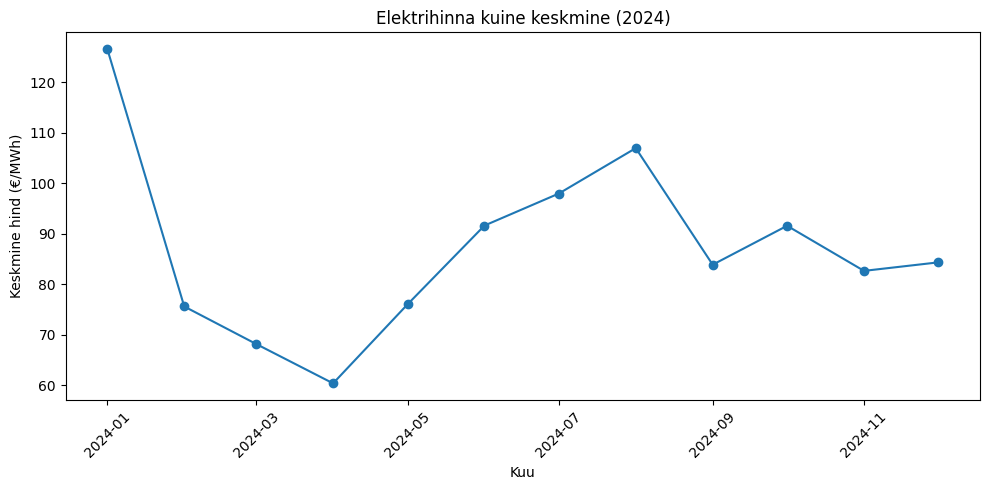

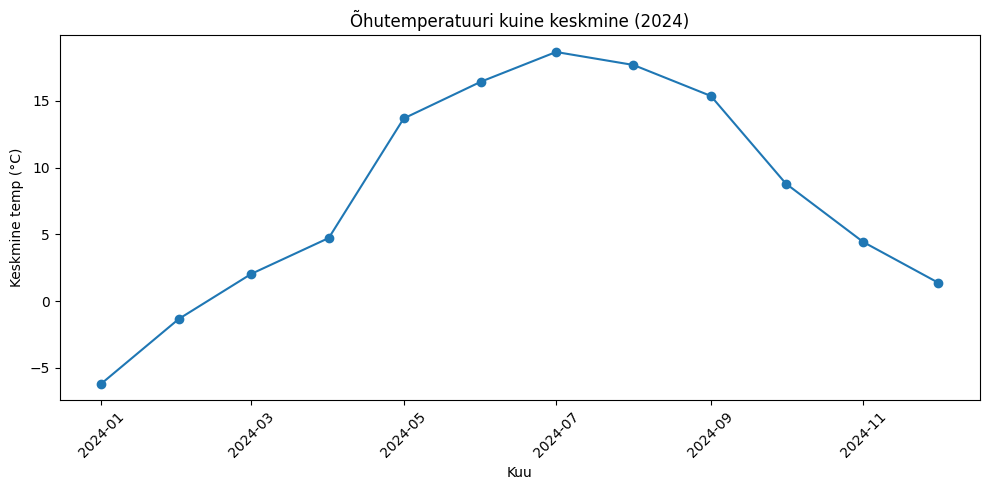

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1) ILM ---

# Lae ilm
weather_path = r"C:\Users\User\Desktop\AndmeTarkusGit\andmeTarkus-1\python_harjutused\Python_excs\ANALYSIS\output\Tallinn-Harku-CSV-2024.csv"
weather_df = pd.read_csv(weather_path)

# Loo datetime (ilma ajavööndita; sinu fail ütleb, et see on UTC)
weather_df["datetime"] = pd.to_datetime(
    weather_df["Aasta"].astype(str) + "-" +
    weather_df["Kuu"].astype(str) + "-" +
    weather_df["Päev"].astype(str) + " " +
    weather_df["Kell (UTC)"]
)

# Kui tahad rangelt märkida, et see on UTC, aga hoida "naive" merge'i jaoks:
# weather_df["datetime"] = pd.to_datetime(..., utc=True).dt.tz_convert("UTC").dt.tz_localize(None)

# --- 2) HINNAD ---

# Lae hinnad sinu JSON-ist
price_path = r"C:\Users\User\Desktop\AndmeTarkusGit\andmeTarkus-1\elektrihind\el1_data_2024.json"
price_raw = pd.read_json(price_path)
price_df = pd.json_normalize(price_raw["data"])

# Kindlusta veerunimed
price_df = price_df.rename(columns={"price": "price_eur_mwh", "datetime": "datetime"})

# Muuda tekst -> datetime
price_df["datetime"] = pd.to_datetime(price_df["datetime"])

# OLULINE: Nord Pooli / kohalikud hinnad on reeglina kohalikus ajas (Europe/Tallinn).
# Lokaliseeri Tallinnasse ja konverteeri UTC-ks, siis eemalda tz, et ühtida weather_df-iga
price_df["datetime"] = (
    price_df["datetime"]
      .dt.tz_localize("Europe/Tallinn", ambiguous="infer", nonexistent="shift_forward")
      .dt.tz_convert("UTC")
      .dt.tz_localize(None)
)

# --- 3) Filtreeri 2024 (mõlemad) ---

start = pd.Timestamp("2024-01-01 00:00:00")
end   = pd.Timestamp("2025-01-01 00:00:00")

weather_2024 = weather_df[(weather_df["datetime"] >= start) & (weather_df["datetime"] < end)].copy()
price_2024   = price_df[(price_df["datetime"] >= start) & (price_df["datetime"] < end)].copy()

# --- 4) Merge ---

merged = pd.merge(weather_2024, price_2024, on="datetime", how="inner")

print("Merged shape:", merged.shape)
print(merged[["datetime", "Õhutemperatuur °C", "price_eur_mwh"]].head())

# --- 5) Kiirkontroll: kui merge ridasid on oluliselt << 8784, siis ajavöönd oli vale.
# Sel juhul proovi kommentaariks panna tz-lokaliseerimine ja võtta hinnad "nagu on".
# price_df["datetime"] = pd.to_datetime(price_df["datetime"])  # ilma tz-käsitluseta

# --- 6) Graafik (kaheteljeline) ---

fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged["datetime"], merged["Õhutemperatuur °C"])
ax1.set_xlabel("Aeg (UTC)")
ax1.set_ylabel("Õhutemperatuur (°C)")

ax2 = ax1.twinx()
ax2.plot(merged["datetime"], merged["price_eur_mwh"])
ax2.set_ylabel("Elektrihind (€/MWh)")

plt.title("Tallinn-Harku õhutemperatuur vs elektrihind (2024)")
plt.tight_layout()
plt.show()

# --- 7) Kuupõhised keskmised (mõlemale) ---

merged["month"] = merged["datetime"].dt.to_period("M").dt.to_timestamp()

monthly = merged.groupby("month", as_index=False).agg(
    avg_temp=("Õhutemperatuur °C", "mean"),
    avg_price=("price_eur_mwh", "mean")
)

print(monthly)

# Näide kuupõhisest graafikust (üks graafik korraga):
plt.figure(figsize=(10,5))
plt.plot(monthly["month"], monthly["avg_price"], marker="o")
plt.title("Elektrihinna kuine keskmine (2024)")
plt.xlabel("Kuu")
plt.ylabel("Keskmine hind (€/MWh)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(monthly["month"], monthly["avg_temp"], marker="o")
plt.title("Õhutemperatuuri kuine keskmine (2024)")
plt.xlabel("Kuu")
plt.ylabel("Keskmine temp (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




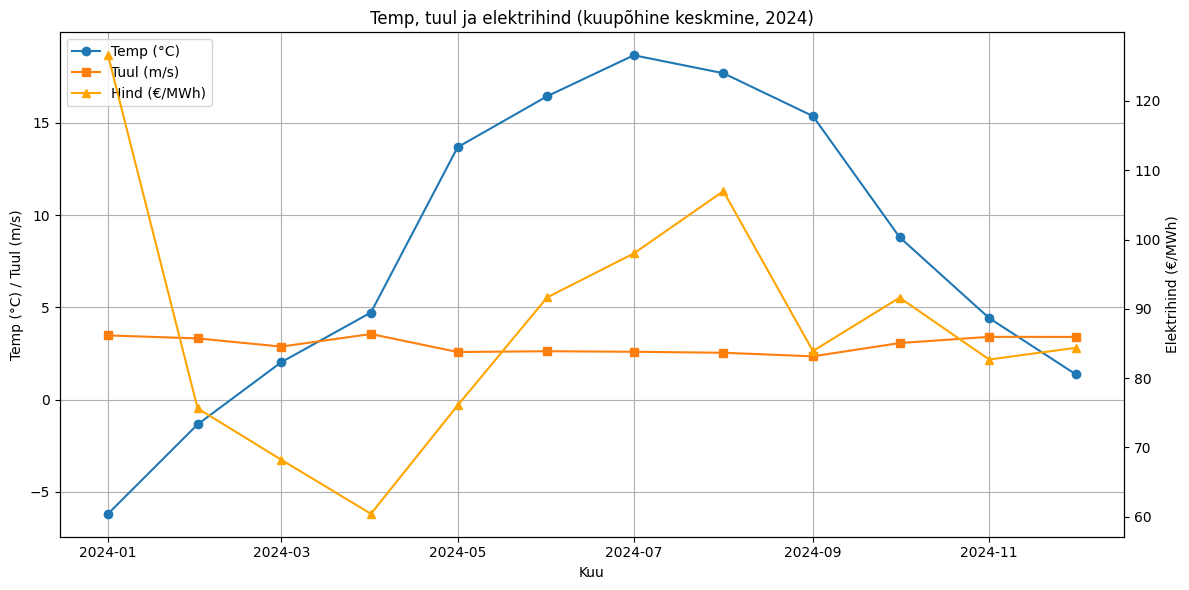

In [33]:
import matplotlib.pyplot as plt

# Kuupõhised keskmised (uuendatud tuule veeruga)
merged = merged.rename(columns={
    "Õhutemperatuur °C": "temp_c",
    "10 minuti keskmine tuule kiirus m/s": "wind_ms"
})

merged["month"] = merged["datetime"].dt.to_period("M").dt.to_timestamp()

monthly = merged.groupby("month", as_index=False).agg(
    avg_temp=("temp_c", "mean"),
    avg_wind=("wind_ms", "mean"),
    avg_price=("price_eur_mwh", "mean")
)

# --- Plot kõik ühel graafikul ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Temp ja tuul vasakule teljele
ax1.plot(monthly["month"], monthly["avg_temp"], marker="o", label="Temp (°C)")
ax1.plot(monthly["month"], monthly["avg_wind"], marker="s", label="Tuul (m/s)")
ax1.set_xlabel("Kuu")
ax1.set_ylabel("Temp (°C) / Tuul (m/s)")
ax1.grid(True)

# Elektrihind paremale teljele
ax2 = ax1.twinx()
ax2.plot(monthly["month"], monthly["avg_price"], marker="^", color="orange", label="Hind (€/MWh)")
ax2.set_ylabel("Elektrihind (€/MWh)")

# Legend mõlemast teljest
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.title("Temp, tuul ja elektrihind (kuupõhine keskmine, 2024)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                 temp_c   wind_ms  price_eur_mwh
temp_c         1.000000 -0.080766      -0.063814
wind_ms       -0.080766  1.000000      -0.192948
price_eur_mwh -0.063814 -0.192948       1.000000


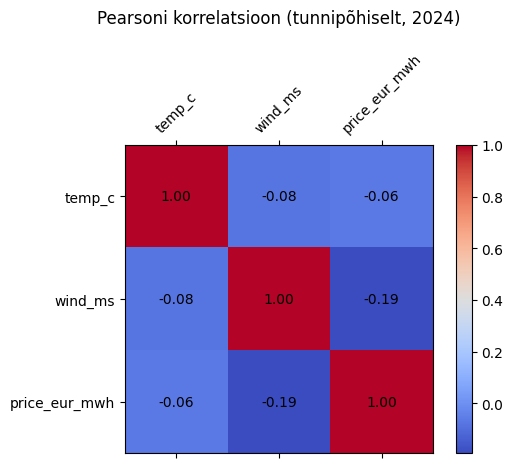

In [36]:
import matplotlib.pyplot as plt

corr_df = merged[["temp_c", "wind_ms", "price_eur_mwh"]].corr(method="pearson")
print(corr_df)

fig, ax = plt.subplots(figsize=(6,4))
cax = ax.matshow(corr_df, cmap="coolwarm")

plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=45)
plt.yticks(range(len(corr_df.columns)), corr_df.columns)

# Lisa väärtused igasse lahtrisse
for (i, j), val in np.ndenumerate(corr_df.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color="black")

plt.colorbar(cax)
plt.title("Pearsoni korrelatsioon (tunnipõhiselt, 2024)", pad=20)
plt.show()